In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
source_name='3C 279'
ra=194.046527
dec=-5.789314
radius=15.
Tstart='2015-06-01T15:56:40'
Tstop='2015-06-30T06:13:10'
host='www.astro.unige.ch/cdci/astrooda/dispatch-data'
time_bin=10000
Nbins=6 # number of time bin in the long-term lightcurve
E1_keV=20.
E2_keV=100.

In [3]:
token=input() # token for restricted access server
cookies=dict(_oauth2_proxy=token)

In [4]:
disp=DispatcherAPI(host=host)

In [5]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=100'
    print(url+params)
    return requests.get(url+params,cookies=cookies).json()

In [6]:
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2015-06-01T15:56:40/2015-06-30T06:13:10?&ra=194.046527&dec=-5.789314&radius=15.0&min_good_isgri=100


In [7]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))

2
1


In [8]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=5,
                      product_type='Real')

154800040010.001,154800050010.001,154800060010.001,154800070010.001,154800080010.001,154800140010.001,154800150010.001,154800160010.001,154800170010.001,154800250010.001,154800460010.001,154900050010.001,154900060010.001,154900070010.001,154900080010.001,154900090010.001,154900140010.001,154900150010.001,154900160010.001,154900170010.001,154900180010.001,154900260010.001,154900470010.001,155000070010.001,155000080010.001,155000090010.001,155000100010.001,155000160010.001,155000170010.001,155000180010.001,155000190010.001,155000200010.001,155000210010.001,155000320010.001,155000330010.001,155000340010.001,155100080010.001,155100090010.001,155100200010.001,155100210010.001,155100220010.001,155100230010.001,155100240010.001,155200020010.001,155200100010.001,155200110010.001,155200120010.001,155200130010.001,155200140010.001,155200200010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 154800040010.001,154800050010.

In [9]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str6,float64,float64,float64,int64,int64,int64,object
2,3C 273,11.387235641479492,187.2696075439453,2.064997434616089,-32768,2,0,0.0002800000074785203
73,NEW_1,7.024626731872559,185.6101531982422,-3.076777458190918,-32767,0,0,None
74,NEW_2,7.132507801055908,197.28179931640625,14.016865730285645,-32767,0,0,None
75,NEW_3,7.291796684265137,204.42095947265625,6.167298316955566,-32767,0,0,None
76,NEW_4,6.767258644104004,190.8853759765625,3.826951026916504,-32767,0,0,None
77,NEW_5,6.0468010902404785,193.96519470214844,-3.409308671951294,-32767,0,0,None
78,NEW_6,6.245404243469238,195.01390075683594,18.42357635498047,-32767,0,0,None
134,NEW_1,5.655722618103027,190.07403564453125,-5.253385543823242,-32767,0,0,None


In [11]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:3]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [12]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row()
    data.dispatcher_catalog_1.table['src_names'][nrows]='3C 279'
    data.dispatcher_catalog_1.table['ra'][nrows]=ra
    data.dispatcher_catalog_1.table['dec'][nrows]=dec
    data.dispatcher_catalog_1.table['ISGRI_FLAG'][nrows]=2

data.dispatcher_catalog_1.table



meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str6,float64,float64,float64,int64,int64,int64,object
2,3C 273,11.387235641479492,187.2696075439453,2.064997434616089,-32768,2,0,0.0002800000074785203
0,3C 279,0.0,194.046527,-5.789314,0,2,0,0


In [13]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

TypeError: Object of type ndarray is not JSON serializable

In [62]:
lc_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists_osa10[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results.append(data)
    


0
155300060010.001,155300070010.001,155300080010.001,155300090010.001,155300100010.001,155300150010.001,155300160010.001,155300170010.001
- waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
scw_list 155300060010.001,155300070010.001,155300080010.001,155300090010.001,155300100010.001,155300150010.001,155300160010.001,155300170010.001
E1_keV 20.0
E2_keV 100.0
osa_version OSA10.2
RA 194.046527
DEC -5.789314
time_bin 10000
selected_catalog {"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[2, 3, 28, 38, 56, 96], ["3C 273", "3C 279", "IGR J12304+0946", "IGR J13091+1137", "NGC 4388", "NGC 4388"], [4.5574564933776855, 4.786496162414551, 3.8660948276519775, 4.101138114929199, 5.109129428863525, 4.204916477203369], [187.32086181640625, 194.04653930664062, 187.6199951171875, 197.27333068847656, 186.44554138183594, 186.4407958984375], [1.974298119544983, -5.789306163787842, 9.776000022888184, 11.634139060974121, 12.662028

In [63]:
t=[]
r=[]
err=[]
tot_counts=[]
backv=[]
backe=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)
for lc in lc_results1:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)

t=np.array(t)
r=np.array(r)
err=np.array(err)
tot_counts=np.array(tot_counts)
backv=np.array(backv)
backe=np.array(backe)

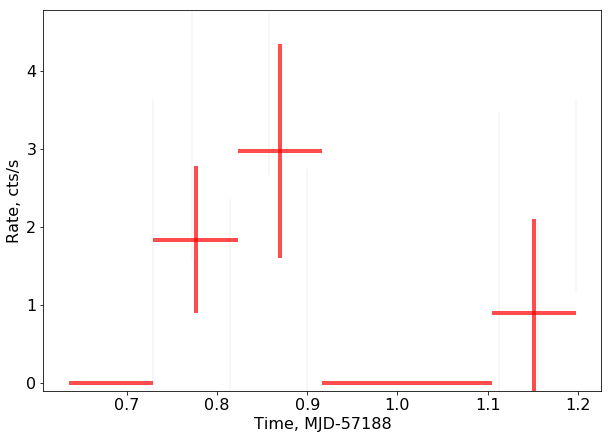

In [68]:
fig = plt.figure(figsize=(10,7))
t0=51544
tmin=t0+t[0]
tmax=t0+t[-1]
time=np.linspace(tmin,tmax,Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
sc=1.

k=0
while (j<len(time)):
    while ((t[k]+t0<time[j])):
        if (err[k]>0.):
            flux[j]=flux[j]+r[k]/(err[k])**2
            error[j]=error[j]+1./(err[k])**2
        k=k+1
        if (k==len(t)):
            break
    if (k==len(t)):
        break
    else:
        j=j+1
plt.errorbar(t+t0-57188,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='black',alpha=0.03,linewidth=2)

for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])*exp((time_av[i]-52900)/40000.)
        error[i]=1./sqrt(error[i])*exp((time_av[i]-52900)/40000.)
plt.errorbar(time_av-57188,flux,yerr=error,xerr=dtime/2.,linestyle='none',color='red',alpha=0.7,linewidth=4)
#plt.plot(time_av,exp((time_av-52900)/40000.)/2)
plt.tick_params(axis='both', which='major', labelsize=16)
ymax=1.1*max(flux+error)
plt.ylim(-0.1,ymax)
plt.xlabel('Time, MJD-57188',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
#plt.text(tmin,0.9*ymax, str(E1_keV)+'-'+str(E2_keV)+' keV',fontsize=16)
#plt.text(tmin,0.8*ymax, source_name,fontsize=16)

name=source_name.replace(" ", "")
plt.savefig(name+'_lc.pdf',format='pdf',dpi=100)




In [65]:
lc_3C279=name+'_lc.pdf'